<a href="https://colab.research.google.com/github/audreyakwenye/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Copy_of_Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
X = df['year'].values[:, np.newaxis]
y = df['price'].values

## 1.2 Split the data into test and train datasets using train_test_split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(4247, 1)
(4248, 1)
(4247,)
(4248,)


## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [0]:
model = LinearRegression()
model.fit(X, y)

beta_0 = model.intercept_
beta_i = model.coef_[0]


## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [18]:
print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)

Slope Coefficients:  1389.3417791584943

Intercept Value:  -2771530.0531882457


## 1.5 Use the test data to make predictions

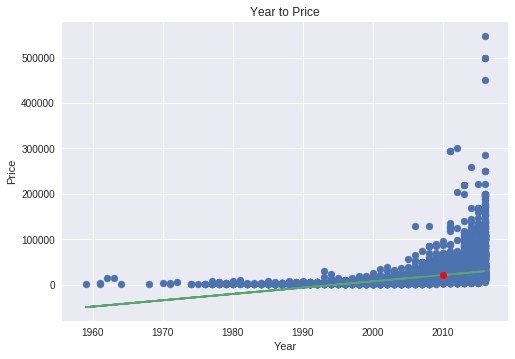

In [19]:
y_test_predict = model.predict(X_test)

m_hat = model.coef_[0]
b_hat = model.intercept_


y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat)


x_value = 2010

prediction = m_hat*x_value + b_hat

plt.scatter(df.year, df.price)

# Plot the line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat)
plt.plot(x_value, prediction, 'ro')

# Graph axes and title
plt.ylabel("Price")
plt.xlabel("Year")
plt.title("Year to Price")
plt.show()

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [20]:
MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 591589930.9584925
RMSE is 24322.621794504237
R^2 is 0.14402416573767363


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

The coefficient is 1389  which means that for each increase in year the price increases by a predicted $1389. 

## 1.8 How should we interpret the Root-Mean-Square Error?

The RMSE is relatively high which says there is a lot of variation between the actual values and predicted values. 

## 1.9 How should we interpret the $R^2$?

The R^2 is .14 which is relatively low which means that actual values are far away from the line of best fit. 

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['ln_price'] = np.log(df['price'])

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price,make_and_body,engine_type_and_drive
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595,23,2
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180,53,3
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103,52,5
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954,55,0
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158,55,4


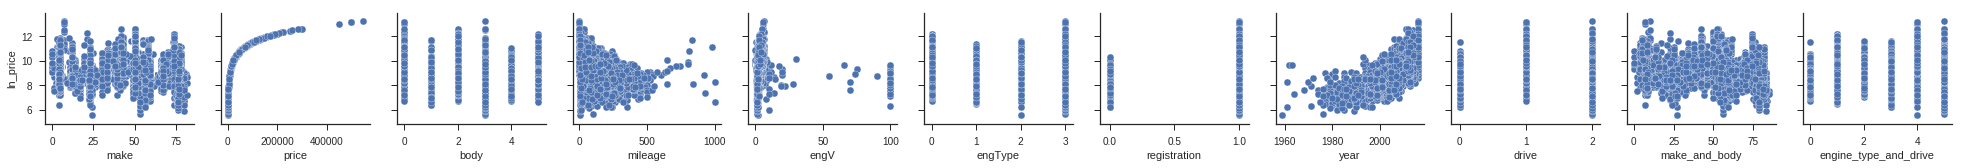

In [30]:
sns.set(style="ticks", color_codes=True)

x_columns = df.columns.drop('ln_price')

sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns)

df.head()

## 2.3 If appropriate, create any polynomial features. 

In [0]:
df['make_and_body'] = df['make']+df['body']
df['engine_type_and_drive'] = df['engType']+df['drive']

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [49]:
y = df.loc[:, ['ln_price']].values
X = df.loc[:, ['make', 'body', 'mileage',
       'engV', 'engType', 'registration', 'year', 'drive', 'make_and_body',
       'engine_type_and_drive']].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)



model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)





RMSE is 0.5688755558287605
R^2 is 0.6562562872549211
coefficients:  [ 2.73214221e-02 -5.60582907e-02 -6.57367388e-05  9.45046486e-03
 -1.73608147e-01  7.29538096e-01  9.41169183e-02  2.87432804e-01
 -2.87368686e-02  1.13824657e-01]
intercepts:  [-180.24161139]


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

The coefficient can be read as a percentage which means the logged price increases by 9.4 percent for each year increased. 

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient Descent takes small steps on a line to get closer to the minimum values which helps us find the best fit. 



## 3.2 What is the "Learning Rate" and what is its function?

The Learning Rate is how effeceintly the moves are in the gradient descent models that gets us to the minimum value. 

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [50]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     2040.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:15:33   Log-Likelihood:                -7167.0
No. Observations:                8495   AIC:                         1.435e+04
Df Residuals:                    8486   BIC:                         1.442e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -181.8341      2.144    -84.810      0.0

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [0]:
# 'Registration' and 'Year' have VIF numbers which indicate multicollienearity

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.loc[:, ['make', 'body', 'mileage',
       'engV', 'engType', 'registration', 'year', 'drive', 'make_and_body',
       'engine_type_and_drive']]

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year',
       'drive', 'make_and_body', 'engine_type_and_drive'],
      dtype='object') 


[inf, inf, 3.676004263355245, 1.2385758236552047, inf, 18.52979143631658, 30.469967624801942, inf, inf, inf]


/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
